# Running Models

## Load libraries and dataframes

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics
from scipy import stats

In [2]:
#Pickle in the log transformed ticket listing count
data_log = pd.read_pickle("./data_log")

In [2]:
#Pickle in the main dataframe with all features + target
c_df = pd.read_pickle('./c_df_dummies.pkl')
c_df = c_df.reset_index(drop=True)

In [3]:
example = pd.read_pickle('./c_df.pkl')

In [4]:
example.head()


,average_price,highest_price,lowest_price,performer_genre,ticket_listing_count,venue_city,event_month,event_day,event_start,time_of_day,wkend_wkday,venue_capacity,venue_score
0,337.0,584.0,253.0,rock,4.0,Brooklyn,02,Fri,19,evening,weekend,small,0.431162
1,337.0,584.0,253.0,electronic,4.0,New York,02,Fri,19,evening,weekend,small,0.455722
2,22.0,24.0,20.0,rock,3.0,Port Chester,02,Fri,20,evening,weekend,large_venue,0.636922
3,45.0,80.0,30.0,pop,4.0,Westbury,02,Fri,20,evening,weekend,large_venue,0.501232
4,92.0,120.0,71.0,alternative,10.0,New York,02,Fri,20,evening,weekend,XL_venue,0.681791


In [4]:
# Drop un-logged data
c_df = c_df.drop(columns=['average_price', 'highest_price', 'lowest_price', 'ticket_listing_count'])

In [5]:
# Add main frame containing dummies with logged continuous values
c_df = pd.concat([c_df, data_log], axis=1)
c_df.head()

,venue_score,performer_genre_alternative,performer_genre_blues,performer_genre_country,performer_genre_electronic,performer_genre_hip-hop,performer_genre_latin,performer_genre_pop,performer_genre_rock,performer_genre_soul,...,venue_capacity_large_venue,venue_capacity_medium_,venue_capacity_small,venue_region_long island,venue_region_new york city,venue_region_upstate,ticket_listing_count,lowest_price,highest_price,average_price
0,0.431162,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1.386294,5.533389,6.369901,5.820083
1,0.455722,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1.386294,5.533389,6.369901,5.820083
2,0.636922,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1.098612,2.995732,3.178054,3.091042
3,0.501232,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1.386294,3.401197,4.382027,3.806662
4,0.681791,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2.302585,4.262680,4.787492,4.521789


In [6]:
c_df.head()

,venue_score,performer_genre_alternative,performer_genre_blues,performer_genre_country,performer_genre_electronic,performer_genre_hip-hop,performer_genre_latin,performer_genre_pop,performer_genre_rock,performer_genre_soul,...,venue_capacity_large_venue,venue_capacity_medium_,venue_capacity_small,venue_region_long island,venue_region_new york city,venue_region_upstate,ticket_listing_count,lowest_price,highest_price,average_price
0,0.431162,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1.386294,5.533389,6.369901,5.820083
1,0.455722,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1.386294,5.533389,6.369901,5.820083
2,0.636922,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1.098612,2.995732,3.178054,3.091042
3,0.501232,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1.386294,3.401197,4.382027,3.806662
4,0.681791,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2.302585,4.262680,4.787492,4.521789


## Using Statsmodels

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Results without [lowest, highest price] features: 

In [ ]:
outcome = 'average_price'
predictors = c_df.drop(columns=['average_price', 'lowest_price', 'highest_price'])
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
predictors_int = sm.add_constant(predictors)
model = sm.OLS(c_df['average_price'],predictors_int).fit()
model.summary()

In [ ]:
stats.probplot(model.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")

### Results with highest price feature

In [ ]:
outcome = 'average_price'
predictors = c_df.drop(columns=['average_price', 'lowest_price'])
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
predictors_int = sm.add_constant(predictors)
model = sm.OLS(c_df['average_price'],predictors_int).fit()
model.summary()

In [ ]:
stats.probplot(model.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")

### Results with lowest price feature

In [10]:
## outcome = 'average_price'
predictors = c_df.drop(columns=['average_price', 'highest_price'])
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
predictors_int = sm.add_constant(predictors)
model = sm.OLS(c_df['average_price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     53.60
Date:                Fri, 15 Mar 2019   Prob (F-statistic):          2.23e-227
Time:                        15:46:38   Log-Likelihood:                -250.43
No. Observations:                1107   AIC:                             584.9
Df Residuals:                    1065   BIC:                             795.2
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
venue_score                     0.8184      0.186      4.395      0.000       0.453       1.184
performer_genre_alternative     0.0086      0.038      0.225      0.822      -0.067       0.084
performer_genre_blues           0.0981      0.041      2.413      0.016       0.018       0.178
performer_genre_country         0.0878      0.030      2.884      0.004       0.028       0.148
performer_genre_electronic      0.0106      0.055      0.193      0.847      -0.097       0.118
performer_genre_hip-hop         0.1022      0.049      2.094      0.036       0.006       0.198
performer_genre_latin           0.1897      0.078      2.445      0.015       0.037       0.342
performer_genre_pop             0.0816      0.021      3.858      0.000       0.040       0.123
performer_genre_rock            0.1472      0.034      4.345      0.000       0.081       0.214
performer_genre_soul            0.0373      0.058      0.644      0.520      -0.076       0.151
event_month_02                 -0.0500      0.042     -1.185      0.236      -0.133       0.033
event_month_03                  0.0295      0.041      0.720      0.472      -0.051       0.110
event_month_04                 -0.0137      0.043     -0.319      0.750      -0.098       0.071
event_month_05                  0.0395      0.046      0.863      0.388      -0.050       0.129
event_month_06                  0.1029      0.050      2.055      0.040       0.005       0.201
event_month_07                  0.2542      0.064      3.979      0.000       0.129       0.380
event_month_08                  0.2543      0.060      4.226      0.000       0.136       0.372
event_month_09                  0.0157      0.072      0.217      0.828      -0.126       0.158
event_month_10                 -0.1547      0.114     -1.359      0.174      -0.378       0.069
event_month_11                  0.4638      0.287      1.619      0.106      -0.098       1.026
event_month_12                 -0.1784      0.204     -0.875      0.382      -0.579       0.222
event_day_Fri                   0.0889      0.022      4.133      0.000       0.047       0.131
event_day_Mon                   0.1337      0.036      3.737      0.000       0.063       0.204
event_day_Sat                   0.0622      0.021      2.983      0.003       0.021       0.103
event_day_Sun                   0.1300      0.028      4.640      0.000       0.075       0.185
event_day_Thu                   0.0958      0.023      4.101      0.000       0.050       0.142
event_day_Tue                   0.0808      0.030      2.711      0.007       0.022       0.139
event_day_Wed                   0.1717      0.027      6.278      0.000       0.118       0.225
time_of_day_afternoon           0.3019      0.060      5.058      0.000       0.185       0.419
time_of_day

In [15]:
c_df.iloc[0]

venue_score                    0.431162
performer_genre_alternative    0.000000
performer_genre_blues          0.000000
performer_genre_country        0.000000
performer_genre_electronic     0.000000
performer_genre_hip-hop        0.000000
performer_genre_latin          0.000000
performer_genre_pop            0.000000
performer_genre_rock           1.000000
performer_genre_soul           0.000000
event_month_02                 1.000000
event_month_03                 0.000000
event_month_04                 0.000000
event_month_05                 0.000000
event_month_06                 0.000000
event_month_07                 0.000000
event_month_08                 0.000000
event_month_09                 0.000000
event_month_10                 0.000000
event_month_11                 0.000000
event_month_12                 0.000000
event_day_Fri                  1.000000
event_day_Mon                  0.000000
event_day_Sat                  0.000000
event_day_Sun                  0.000000


In [20]:
np.array(c_df.iloc[420])

array([0.68179065, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 4.85203026, 4.17438727,
       6.36990098, 4.93447393])

In [22]:
model.predict(np.array(c_df.iloc[420])[:-2])

array([5.20526586])

In [25]:
np.exp(model.predict(np.array(c_df.iloc[429])[:-2]))

array([97.80064401])

Text(0.5, 1.0, 'Model1 Residuals Probability Plot')

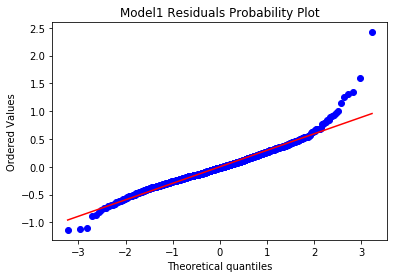

In [9]:
stats.probplot(model.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")

### Results with all features

In [ ]:
outcome = 'average_price'
predictors = c_df.drop(columns=['average_price'])
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
predictors_int = sm.add_constant(predictors)
model = sm.OLS(c_df['average_price'],predictors_int).fit()
model.summary()

In [ ]:
stats.probplot(model.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")